In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle

In [2]:
def data_split(x,y):
  xn_train = x[:,:-1]
  xn_label = x[:,-1]
  xn_test = y[:,:-1]
  yn_label = y[:,-1]
  return xn_train, xn_label, xn_test, yn_label

In [3]:
def ref(x,y):
  z = np.zeros([y.shape[0],1])
  for i in range(y.shape[0]):
    if y[i] == 1:
      z[i] = 1
    else:
      z[i] = -1
  xn = np.column_stack((np.ones([x.shape[0],1],dtype=float),x))
  g = np.multiply(xn, z)
  return xn, g 

def crit(w,x):
  j = 0
  l = int(x.shape[0])
  for i in range(l):
    if (np.dot(w.T, x[i,:]) <= 0):
      j = (j - np.dot(w.T, x[i,:]))
  return j

def predict(w,x):
  w_pred = np.zeros([int(x.shape[0]),1])
  for i in range(int(x.shape[0])):
    z = np.dot(w.T, x[i,:])
    if z < 0:
      w_pred[i] = 2
    else:
      w_pred[i] = 1
  
  return w_pred

def error(x,y):
  count = 0
  for i in range(int(x.shape[0])):
    if x[i]!=y[i]:
      count = count + 1
  err = (count/int(x.shape[0]))*100
  return err

In [4]:
data_train = np.array(np.loadtxt("/content/dataset1_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset1_test.csv", delimiter = ",", dtype = float))

In [5]:
xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)

# #Shuffling the dataset
# xn = shuffle(xn, random_state = 150)
# g = shuffle(g, random_state = 150)
# xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = np.ones([3,1])
w_out = np.ones([3,10000])

#Training 
l = int(g.shape[0])
epochs = int(10000/l)
axis = []
for i in range(epochs):
  count = 0
  xn,g,xn_label = shuffle(xn,g,xn_label)
  # g = shuffle(g)
  # xn_label = shuffle(xn_label)

  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w.T, g[j,:])

    if z <= 0:
      w = w + 1*g[j,:].reshape([3,1])
      count = 0
    
    else:
      count = count + 1
    
    w_out[:,ind] = w.T
  
  if count == 100:
    print('Linearly Separable')
    break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The training classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

Linearly Separable
The optimal weights are: [ 0.        -3.2421062  2.9711619]
The training classification error is: 0.0
The testing classification error is: 0.0


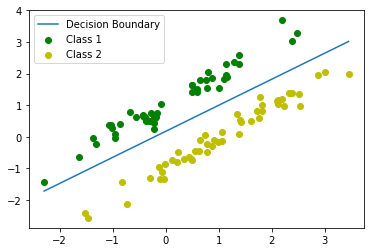

In [29]:
x_min = min(xn[:, 1])
x_max = max(xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(xn[xn_label == 1, 1], xn[xn_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(xn[xn_label == 2, 1], xn[xn_label == 2, 2], c='y', label = 'Class 2')
plt.legend() 

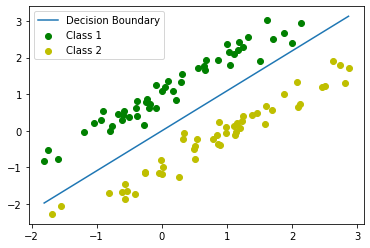

In [6]:
x_min = min(test_xn[:, 1])
x_max = max(test_xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(test_xn[y_label == 1, 1], test_xn[y_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(test_xn[y_label == 2, 1], test_xn[y_label == 2, 2], c='y', label = 'Class 2')
plt.legend() 

In [7]:
data_train = np.array(np.loadtxt("/content/dataset1_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset1_test.csv", delimiter = ",", dtype = float))

xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)

# #Shuffling the dataset
# xn = shuffle(xn, random_state = 150)
# g = shuffle(g, random_state = 150)
# xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = np.ones([3,1])
w_out = np.ones([3,10000])

#Training 
l = int(g.shape[0])
epochs = int(10000/l)
axis = []
accu_train = []
accu_test = []
k = 0
J = []
w_t = []

while (k!=10):
  
  for i in range(epochs):
    count = 0
    xn,g,xn_label = shuffle(xn,g,xn_label)
    # g = shuffle(g)
    # xn_label = shuffle(xn_label)

    for j in range(l):
      ind = i*epochs + j
      axis.append(ind + 1)
      z = np.dot(w.T, g[j,:])

      if z <= 0:
        w = w + 1*g[j,:].reshape([3,1])
        count = 0
      
      else:
        count = count + 1
      
      w_out[:,ind] = w.T
    
    if count == 100:
      #print('Linearly Separable')
      break

  J_d = np.zeros(10000)

  for j in range(10000):
    J_d[j] = crit(w_out[:,j], g)

  w_opt = w_out[:, np.argmin(J_d)]
  w_t.append(w_opt)
  train_label = predict(w_opt,xn)
  err = error(train_label, xn_label)
  accu_train.append(100 - err)
  test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
  test_label = predict(w_opt,test_xn)
  err_test = error(train_label, xn_label)
  accu_test.append(100 - err_test)
  k = k + 1

mean_train = np.mean(np.array(accu_train), axis = 0)
std_train = np.std(np.array(accu_train), axis = 0)
mean_test = np.mean(np.array(accu_test), axis = 0)
std_test = np.std(np.array(accu_test), axis = 0)

print("The mean and standard deviation for training accuracy is as follows: {:.2f}%, {:.2f}".format(mean_train,std_train))
print("The mean and standard deviation for testing accuracy is as follows: {:.2f}%, {:.2f}".format(mean_test,std_test))

KeyboardInterrupt: ignored

In [8]:
data_train = np.array(np.loadtxt("/content/dataset2_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset2_test.csv", delimiter = ",", dtype = float))

xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)

# #Shuffling the dataset
# xn = shuffle(xn, random_state = 150)
# g = shuffle(g, random_state = 150)
# xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = np.ones([3,1])
w_out = np.ones([3,10000])

#Training 
l = int(g.shape[0])
epochs = int(10000/l)
axis = []
for i in range(epochs):
  count = 0
  xn,g,xn_label = shuffle(xn,g,xn_label)
  # g = shuffle(g)
  # xn_label = shuffle(xn_label)

  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w.T, g[j,:])

    if z <= 0:
      w = w + 1*g[j,:].reshape([3,1])
      count = 0
    
    else:
      count = count + 1
    
    w_out[:,ind] = w.T
  
  if count == 100:
    print('Linearly Separable')
    break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The training classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

Linearly Separable
The optimal weights are: [-2.          0.08243714  6.53429809]
The training classification error is: 0.0
The testing classification error is: 2.0


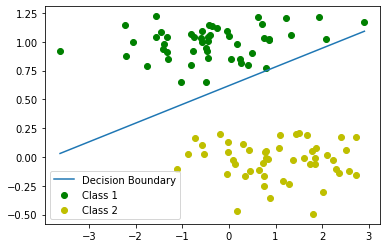

In [32]:
x_min = min(xn[:, 1])
x_max = max(xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(xn[xn_label == 1, 1], xn[xn_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(xn[xn_label == 2, 1], xn[xn_label == 2, 2], c='y', label = 'Class 2')
plt.legend() 

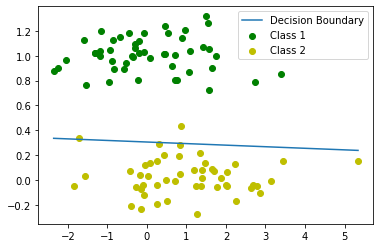

In [9]:
x_min = min(test_xn[:, 1])
x_max = max(test_xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(test_xn[y_label == 1, 1], test_xn[y_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(test_xn[y_label == 2, 1], test_xn[y_label == 2, 2], c='y', label = 'Class 2')
plt.legend() 

In [46]:
data_train = np.array(np.loadtxt("/content/dataset2_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset2_test.csv", delimiter = ",", dtype = float))

xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)

# #Shuffling the dataset
# xn = shuffle(xn, random_state = 150)
# g = shuffle(g, random_state = 150)
# xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = np.ones([3,1])
w_out = np.ones([3,10000])

#Training 
l = int(g.shape[0])
epochs = int(10000/l)
axis = []
accu_train = []
accu_test = []
k = 0
J = []
w_t = []

while (k!=10):
  
  for i in range(epochs):
    count = 0
    xn,g,xn_label = shuffle(xn,g,xn_label)
    # g = shuffle(g)
    # xn_label = shuffle(xn_label)

    for j in range(l):
      ind = i*epochs + j
      axis.append(ind + 1)
      z = np.dot(w.T, g[j,:])

      if z <= 0:
        w = w + 1*g[j,:].reshape([3,1])
        count = 0
      
      else:
        count = count + 1
      
      w_out[:,ind] = w.T
    
    if count == 100:
      #print('Linearly Separable')
      break

  J_d = np.zeros(10000)

  for j in range(10000):
    J_d[j] = crit(w_out[:,j], g)

  w_opt = w_out[:, np.argmin(J_d)]
  w_t.append(w_opt)
  train_label = predict(w_opt,xn)
  err = error(train_label, xn_label)
  accu_train.append(100 - err)
  test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
  test_label = predict(w_opt,test_xn)
  err_test = error(test_label, y_label)
  accu_test.append(100 - err_test)
  k = k + 1

mean_train = np.mean(np.array(accu_train), axis = 0)
std_train = np.std(np.array(accu_train), axis = 0)
mean_test = np.mean(np.array(accu_test), axis = 0)
std_test = np.std(np.array(accu_test), axis = 0)

print("The mean and standard deviation for training accuracy is as follows: {:.2f}%, {:.2f}".format(mean_train,std_train))
print("The mean and standard deviation for testing accuracy is as follows: {:.2f}%, {:.2f}".format(mean_test,std_test))

The mean and standard deviation for training accuracy is as follows: 100.00%, 0.00
The mean and standard deviation for testing accuracy is as follows: 97.00%, 0.00


In [13]:
data_train = np.array(np.loadtxt("/content/dataset3_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset3_test.csv", delimiter = ",", dtype = float))

xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)

# #Shuffling the dataset
# xn = shuffle(xn, random_state = 150)
# g = shuffle(g, random_state = 150)
# xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = np.ones([3,1])
w_out = np.ones([3,10000])

#Training 
l = int(g.shape[0])
epochs = int(10000/l)
axis = []
for i in range(epochs):
  count = 0
  xn,g,xn_label = shuffle(xn,g,xn_label)
  # g = shuffle(g)
  # xn_label = shuffle(xn_label)

  for j in range(l):
    ind = i*epochs + j
    axis.append(ind + 1)
    z = np.dot(w.T, g[j,:])

    if z <= 0:
      w = w + 1*g[j,:].reshape([3,1])
      count = 0
    
    else:
      count = count + 1
    
    w_out[:,ind] = w.T
  
  if count == 100:
    print('Linearly Separable')
    break

J_d = np.zeros(10000)

for j in range(10000):
  J_d[j] = crit(w_out[:,j], g)

w_opt = w_out[:, np.argmin(J_d)]
print('The optimal weights are:', w_opt)

train_label = predict(w_opt,xn)
print('The training classification error is:', error(train_label, xn_label))

test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
test_label = predict(w_opt,test_xn)

print('The testing classification error is:', error(test_label, y_label))

The optimal weights are: [ 0.         -0.11484506 -0.05182457]
The training classification error is: 21.0
The testing classification error is: 28.000000000000004


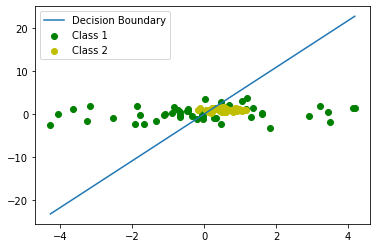

In [12]:
x_min = min(xn[:, 1])
x_max = max(xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(xn[xn_label == 1, 1], xn[xn_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(xn[xn_label == 2, 1], xn[xn_label == 2, 2], c='y', label = 'Class 2')
plt.legend() 

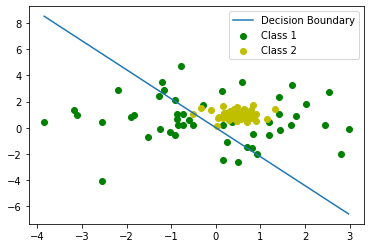

In [14]:
x_min = min(test_xn[:, 1])
x_max = max(test_xn[:, 1])
x = np.linspace(x_min, x_max)
y = -(w_opt[0]+w_opt[1]*x)/w_opt[2]

plt.plot(x, y, label = 'Decision Boundary')
plt.scatter(test_xn[y_label == 1, 1], test_xn[y_label == 1, 2], c='g', label = 'Class 1')
plt.scatter(test_xn[y_label == 2, 1], test_xn[y_label == 2, 2], c='y', label = 'Class 2')
plt.legend() 

In [45]:
data_train = np.array(np.loadtxt("/content/dataset3_train.csv", delimiter = ",", dtype = float))
data_test = np.array(np.loadtxt("/content/dataset3_test.csv", delimiter = ",", dtype = float))

xn_train,xn_label,xn_test,y_label = data_split(data_train, data_test)
xn, g = ref(xn_train, xn_label)

# #Shuffling the dataset
# xn = shuffle(xn, random_state = 150)
# g = shuffle(g, random_state = 150)
# xn_label = shuffle(xn_label, random_state = 150)

#Initializing the weights
w = np.ones([3,1])
w_out = np.ones([3,10000])

#Training 
l = int(g.shape[0])
epochs = int(10000/l)
axis = []
accu_train = []
accu_test = []
k = 0
J = []
w_t = []

while (k!=10):
  
  for i in range(epochs):
    count = 0
    xn,g,xn_label = shuffle(xn,g,xn_label)
    # g = shuffle(g)
    # xn_label = shuffle(xn_label)

    for j in range(l):
      ind = i*epochs + j
      axis.append(ind + 1)
      z = np.dot(w.T, g[j,:])

      if z <= 0:
        w = w + 1*g[j,:].reshape([3,1])
        count = 0
      
      else:
        count = count + 1
      
      w_out[:,ind] = w.T
    
    if count == 100:
      #print('Linearly Separable')
      break

  J_d = np.zeros(10000)

  for j in range(10000):
    J_d[j] = crit(w_out[:,j], g)

  w_opt = w_out[:, np.argmin(J_d)]
  w_t.append(w_opt)
  train_label = predict(w_opt,xn)
  err = error(train_label, xn_label)
  accu_train.append(100 - err)
  test_xn = np.column_stack((np.ones([xn_test.shape[0],1],dtype=float),xn_test))
  test_label = predict(w_opt,test_xn)
  err_test = error(test_label, y_label)
  accu_test.append(100 - err_test)
  k = k + 1

mean_train = np.mean(np.array(accu_train), axis = 0)
std_train = np.std(np.array(accu_train), axis = 0)
mean_test = np.mean(np.array(accu_test), axis = 0)
std_test = np.std(np.array(accu_test), axis = 0)

print("The mean and standard deviation for training accuracy is as follows: {:.2f}%, {:.2f}".format(mean_train,std_train))
print("The mean and standard deviation for testing accuracy is as follows: {:.2f}%, {:.2f}".format(mean_test,std_test))

The mean and standard deviation for training accuracy is as follows: 70.20%, 6.00
The mean and standard deviation for testing accuracy is as follows: 66.00%, 5.66
